In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import pandas as pd
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
df = pd.read_csv("FIFA22_official_data.csv")

In [4]:
df.head()
df.describe()

,ID,Age,Overall,Potential,Value,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Composure,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Overall Rating,DefensiveAwareness
count,16710.000000,16710.000000,16710.000000,16710.000000,16710.000000,16710.000000,16710.000000,16710.000000,16710.000000,16684.000000,...,16459.000000,16710.000000,16673.000000,16710.000000,16710.000000,16710.000000,16710.000000,16710.000000,16710.000000,15818.000000
mean,220560.467923,25.727409,67.646320,72.572292,3347.235787,1652.497307,1.169958,3.008199,2.475464,20.458643,...,61.001883,49.155536,46.830564,15.683662,15.521364,15.457989,15.581927,15.789228,68.565410,48.019408
std,38496.607959,5.048910,6.457695,5.688085,8123.399280,257.271696,0.485305,0.681742,0.791414,17.699813,...,11.399833,21.454857,21.175431,17.009757,16.302298,16.099993,16.584045,17.318251,6.256253,20.181354
min,27.000000,16.000000,28.000000,38.000000,0.000000,571.000000,1.000000,1.000000,1.000000,1.000000,...,12.000000,3.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,3.000000
25%,203891.250000,22.000000,63.000000,69.000000,600.000000,1525.000000,1.000000,3.000000,2.000000,8.000000,...,55.000000,29.000000,26.000000,8.000000,8.000000,8.000000,8.000000,8.000000,65.000000,30.000000
50%,229253.000000,25.000000,68.000000,72.000000,1200.000000,1687.000000,1.000000,3.000000,2.000000,17.000000,...,62.000000,57.000000,54.000000,11.000000,11.000000,11.000000,11.000000,11.000000,68.000000,54.000000
75%,245368.750000,29.000000,72.000000,76.000000,2500.000000,1826.000000,1.000000,3.000000,3.000000,27.000000,...,69.000000,67.000000,65.000000,14.000000,14.000000,14.000000,14.000000,14.000000,73.000000,65.000000
max,264704.000000,54.000000,93.000000,95.000000,194000.000000,2341.000000,5.000000,5.000000,5.000000,99.000000,...,96.000000,93.000000,95.000000,91.000000,92.000000,93.000000,93.000000,90.000000,93.000000,93.000000


In [5]:
print(len(df.columns.values))
df.columns.values

62


array(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Contract Valid Until', 'Height(in cm)',
       'Weight(kgs)', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed',
       'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping',
       'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions',
       'Positioning', 'Vision', 'Penalties', 'Composure',
       'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Best Position',
       'Best Overall Rating', 'Release Clause', 'DefensiveAwareness'],
      dtype=object)

In [6]:
# Replace '#VALUE!' with NaN
df.replace('#VALUE!', np.nan, inplace=True)
rows_with_nan = df.isna().any(axis=1)
count_rows_with_nan = rows_with_nan.sum()

print("Number of rows with NaN values:", count_rows_with_nan)

Number of rows with NaN values: 2312


In [7]:
# Dropping all rows with NaN values
df_cleaned = df.dropna().reset_index(drop=True)
print("DataFrame after dropping rows with NaN values:")
print(df_cleaned)

DataFrame after dropping rows with NaN values:
           ID             Name  Age  \
0      212198  Bruno Fernandes   26   
1      209658      L. Goretzka   26   
2      176580        L. Suárez   34   
3      192985     K. De Bruyne   30   
4      224334         M. Acuña   29   
...       ...              ...  ...   
14393  259718      F. Gebhardt   19   
14394  251433          B. Voll   20   
14395  262846         �. Dobre   20   
14396  241317   21 Xue Qinghao   19   
14397  259646        A. Shaikh   18   

                                                  Photo Nationality  \
0      https://cdn.sofifa.net/players/212/198/22_60.png    Portugal   
1      https://cdn.sofifa.net/players/209/658/22_60.png     Germany   
2      https://cdn.sofifa.net/players/176/580/22_60.png     Uruguay   
3      https://cdn.sofifa.net/players/192/985/22_60.png     Belgium   
4      https://cdn.sofifa.net/players/224/334/22_60.png   Argentina   
...                                                 ...   

In [8]:
#keeping important features only
df_features_imp = df_cleaned[['Potential','Skill Moves','Weight(kgs)','ShortPassing','LongPassing','Agility','Stamina','Positioning','StandingTackle','GKKicking','Best Overall Rating','DefensiveAwareness','Crossing','Volleys','BallControl','Reactions','Strength','Vision','SlidingTackle','GKPositioning','Weak Foot','Finishing','Dribbling','Acceleration','Balance','LongShots','Penalties','GKDiving','GKReflexes','Height(in cm)','HeadingAccuracy','Curve','SprintSpeed','ShotPower','Aggression','Composure','GKHandling','Overall','FKAccuracy','Jumping','Interceptions']]

In [9]:
df_features_imp.head()

,Potential,Skill Moves,Weight(kgs),ShortPassing,LongPassing,Agility,Stamina,Positioning,StandingTackle,GKKicking,...,Curve,SprintSpeed,ShotPower,Aggression,Composure,GKHandling,Overall,FKAccuracy,Jumping,Interceptions
0,89,4,69,91,88,80.0,91,87.0,73,15,...,87.0,73,89,78,87.0,14,88,87,73.0,66.0
1,88,3,82,86,84,76.0,88,85.0,85,15,...,76.0,83,85,81,82.0,8,87,75,79.0,86.0
2,88,3,83,83,77,75.0,78,91.0,45,31,...,86.0,69,89,87,87.0,25,88,82,69.0,41.0
3,91,4,70,94,93,79.0,89,88.0,65,5,...,85.0,76,91,76,89.0,13,91,83,63.0,66.0
4,84,4,69,82,78,83.0,90,81.0,84,13,...,88.0,76,82,84,87.0,14,84,75,63.0,79.0


In [10]:
X = df_features_imp.loc[:, df_features_imp.columns != 'Overall']
y = df_features_imp.loc[:, df_features_imp.columns == 'Overall']
y = y.values.ravel()

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.20)

In [12]:
print(y_train)
print(X_train.columns)
print(len(X_train.columns))

[64 65 76 ... 68 78 62]
Index(['Potential', 'Skill Moves', 'Weight(kgs)', 'ShortPassing',
       'LongPassing', 'Agility', 'Stamina', 'Positioning', 'StandingTackle',
       'GKKicking', 'Best Overall Rating', 'DefensiveAwareness', 'Crossing',
       'Volleys', 'BallControl', 'Reactions', 'Strength', 'Vision',
       'SlidingTackle', 'GKPositioning', 'Weak Foot', 'Finishing', 'Dribbling',
       'Acceleration', 'Balance', 'LongShots', 'Penalties', 'GKDiving',
       'GKReflexes', 'Height(in cm)', 'HeadingAccuracy', 'Curve',
       'SprintSpeed', 'ShotPower', 'Aggression', 'Composure', 'GKHandling',
       'FKAccuracy', 'Jumping', 'Interceptions'],
      dtype='object')
40


----
## Logistic Regression
----

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

log_reg = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42, multi_class='multinomial')
log_reg.fit(X_train, y_train)

C:\Users\Hamza Khattak\TechWorks\Python\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42)

In [14]:
# Check the Accuracy
log_reg.score(X_test, y_test)

0.2152777777777778

----
## Ridge Regression
----

In [17]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=1, random_state=42, solver='cholesky')

In [18]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

y_pred = ridge_reg.predict(X_test)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared score for Ridge Regression:", r2)

R-squared score for Ridge Regression: 0.9809386494931144


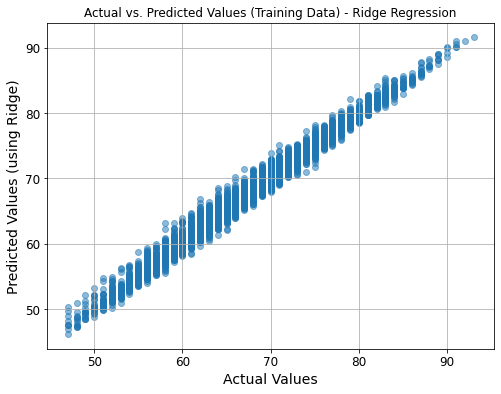

In [19]:
import matplotlib.pyplot as plt

y_pred_ridge = ridge_reg.predict(X_train)

plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_pred_ridge, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values (using Ridge)")
plt.title("Actual vs. Predicted Values (Training Data) - Ridge Regression")
plt.grid(True)
plt.show()

----
## Bayesian Ridge Regression
----

In [20]:
from sklearn.linear_model import BayesianRidge

# Create and fit a Bayesian Ridge Regression model
bayesian_ridge_reg = BayesianRidge()
bayesian_ridge_reg.fit(X_train, y_train)

BayesianRidge()

In [21]:
from sklearn.metrics import r2_score
y_pred = bayesian_ridge_reg.predict(X_test)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)

print("R-squared score:", r2)

R-squared score: 0.9809395399396642


----
## Elastic Net For Ridge and Lasso
----

In [22]:
# An ElasticNet (for lasso and ridge)
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X_train, y_train)

ElasticNet(alpha=0.1, random_state=42)

In [23]:
y_pred = elastic_net.predict(X_test)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared score - Elastic Net For Ridge and Lasso:", r2)

R-squared score - Elastic Net For Ridge and Lasso: 0.9808380150615371


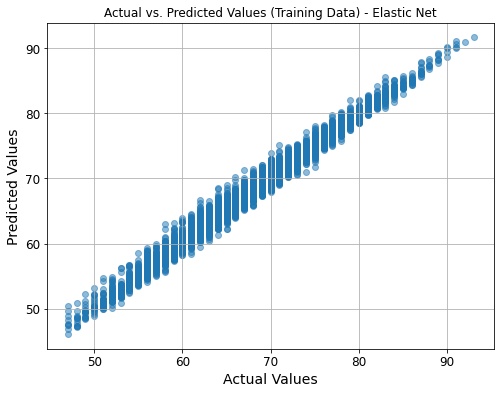

In [24]:
import matplotlib.pyplot as plt

y_pred = elastic_net.predict(X_train)  

plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Training Data) - Elastic Net")
plt.grid(True)
plt.show()

In [39]:
intercept = elastic_net.intercept_
coefficients = elastic_net.coef_
print(coefficients)
print(intercept)

[-3.13608030e-02  0.00000000e+00  4.42040074e-03 -2.02899949e-03
 -1.12753217e-02  0.00000000e+00  1.72224822e-03  5.19929153e-03
 -3.47251215e-03  9.78381229e-03  9.60667636e-01  3.97292822e-03
  3.20920434e-02  0.00000000e+00  2.97412729e-03  2.59104887e-02
  1.98690910e-03 -1.10164436e-02 -9.18431114e-04  9.72623500e-03
  0.00000000e+00 -8.20491466e-03  6.33714241e-04 -5.94692136e-03
 -6.83018069e-03 -3.16087317e-04  3.48004299e-03  1.24997147e-02
  8.62123907e-03 -1.48468972e-02  8.67376009e-03  3.16805172e-03
 -0.00000000e+00  0.00000000e+00  5.13394556e-03  1.18313801e-02
  7.94280527e-03  1.11188436e-03  1.78898049e-03  1.33109346e-03]
2.1451486605062655


In [26]:
feature_names = X_train.columns.tolist()
feature_coeff_pairs = []
feature_coeff_pairs = list(zip(feature_names, coefficients))

In [27]:
#defining my function keep absolute values only (getting idea of magnitude)
def abs_coefficient(pair):
    return abs(pair[1])

In [28]:
feature_coeff_pairs.sort(key=abs_coefficient, reverse=True)

top_features = feature_coeff_pairs[:10]

for feature, coefficient in top_features:
    print(f"{feature}: {coefficient}")

Best Overall Rating: 0.9606676360771929
Crossing: 0.03209204342650068
Potential: -0.031360803039461704
Reactions: 0.02591048873533787
Height(in cm): -0.014846897199587998
GKDiving: 0.012499714745800644
Composure: 0.01183138011626488
LongPassing: -0.011275321684458904
Vision: -0.01101644364385573
GKKicking: 0.009783812287722314


____
## Check for multi-collinearity
____

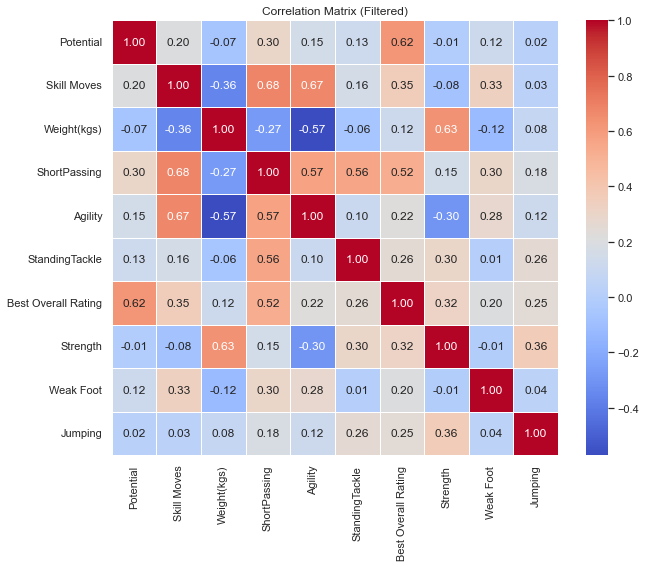

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Remove highly correlated columns using my threshold 0.9
# Credits to https://www.projectpro.io/recipes/drop-out-highly-correlated-features-in-python

def remove_highly_correlated_features(data_frame, threshold=0.9):
    corr_matrix = data_frame.corr().abs()
    upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > threshold)]
    data_frame_filtered = data_frame.drop(columns=to_drop)
    return data_frame_filtered

# Remove highly correlated columns using 0.7 (replace 0.9)
threshold = 0.7
X_train_filtered = remove_highly_correlated_features(X_train, threshold)

# Correlation matrix for the filtered data
correlation_matrix_filtered = X_train_filtered.corr()

# Creating heatmap
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.0)
sns.heatmap(correlation_matrix_filtered, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix (Filtered)")
plt.show()


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.20)

X_train_filtered = remove_highly_correlated_features(X_train, threshold=0.7)
X_test_filtered = X_test[X_train_filtered.columns]

# Create and fit the StandardScaler to normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_filtered)
X_test_scaled = scaler.transform(X_test_filtered)

ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X_train_scaled, y_train)


y_pred = ridge_reg.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

R-squared score: 0.9770327401332687


In [31]:
predictions = elastic_net.predict(X)
len(predictions)

14398

In [32]:
df_cleaned['Predicted Score'] = predictions
df_cleaned.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness,Predicted Score
0,212198,Bruno Fernandes,26,https://cdn.sofifa.net/players/212/198/22_60.png,Portugal,https://cdn.sofifa.net/flags/pt.png,88,89,Manchester United,https://cdn.sofifa.net/teams/11/30.png,...,12,14,15,8,14,CAM,88,206900,72.0,87.346279
1,209658,L. Goretzka,26,https://cdn.sofifa.net/players/209/658/22_60.png,Germany,https://cdn.sofifa.net/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.net/teams/21/30.png,...,13,8,15,11,9,CM,87,160400,74.0,85.997678
2,176580,L. Suárez,34,https://cdn.sofifa.net/players/176/580/22_60.png,Uruguay,https://cdn.sofifa.net/flags/uy.png,88,88,Atlético de Madrid,https://cdn.sofifa.net/teams/240/30.png,...,27,25,31,33,37,ST,88,91200,42.0,88.377263
3,192985,K. De Bruyne,30,https://cdn.sofifa.net/players/192/985/22_60.png,Belgium,https://cdn.sofifa.net/flags/be.png,91,91,Manchester City,https://cdn.sofifa.net/teams/10/30.png,...,15,13,5,10,13,CM,91,232200,68.0,90.147795
4,224334,M. Acuña,29,https://cdn.sofifa.net/players/224/334/22_60.png,Argentina,https://cdn.sofifa.net/flags/ar.png,84,84,Sevilla FC,https://cdn.sofifa.net/teams/481/30.png,...,8,14,13,13,14,LB,84,77700,80.0,83.708380


In [33]:
%%capture
# Using position groups
defensive_positions = ['LB', 'CDM', 'CB', 'RB', 'LWB', 'RWB']
offensive_positions = ['CAM', 'ST', 'RW', 'LW', 'CF']
midfield_positions = ['CM', 'RM', 'LM']
gk_positions = ['GK']

#Df to store the selected players
selected_players = pd.DataFrame()

#One player from each position
for positions in [defensive_positions, offensive_positions, gk_positions]:
    filtered_players = df_cleaned[df_cleaned['Best Position'].isin(positions)]
    top_players = filtered_players.nlargest(1, 'Predicted Score')
    selected_players = selected_players.append(top_players)


#Select two players from midfield
filtered_midfield_players = df_cleaned[df_cleaned['Best Position'].isin(midfield_positions)]
top_midfield_players = filtered_midfield_players.nlargest(2, 'Predicted Score')
selected_players = selected_players.append(top_midfield_players)

In [34]:
from IPython.display import Image, display, HTML

#Credits to https://bobbyhadz.com/blog/jupyter-notebook-display-list-as-table
#Credits to https://stackoverflow.com/questions/47113934/how-to-display-table-with-text-and-images-in-jupyter-notebook

html_output = '<div style="text-align: center; font-family: Arial; font-weight: bold; font-size: 24px;">'
html_output += 'The current Top 5'
html_output += '</div>'
html_output += '<hr>'
html_output += '<div style="display: flex;">'

# Loop to access the images of flags, etc.
for i in range(5):
    player_photo_url = selected_players['Photo'].iloc[i]
    player_flag_url = selected_players['Flag'].iloc[i]
    player_club_url = selected_players['Club Logo'].iloc[i]
    player_name = selected_players['Name'].iloc[i]
    predicted_score = selected_players['Predicted Score'].iloc[i]
    actual_score = selected_players['Overall'].iloc[i]
    best_pos = selected_players['Best Position'].iloc[i]

    predicted_score = round(predicted_score, 2)
    html_output += '<div style="display: flex; flex-direction: column; margin-right: 20px;">'
    html_output += f'<img src="{player_photo_url}" width="300" height="200"/>'
    html_output += f'<img src="{player_flag_url}" width="50" height="50"/>'
    html_output += f'<img src="{player_club_url}" width="50" height="50"/>'
    html_output += f'<b>{player_name}</b>'
    html_output += f'Best Position: {best_pos}<br>Predicted Score: {predicted_score}<br>Actual Score: {actual_score}'
    html_output += '</div>'

html_output += '</div>'
display(HTML(html_output))

In [35]:
Ronaldo = ['94', '5', '176', '83', '77', '90', '92', '94', '31', '15', '91', '34', '84', '88', '93', '96', '80', '85', '23', '14', '4', '93', '92', '91', '63', '90', '85', '7', '11', '187', '85', '81', '92', '92', '63', '86', '11', '76', '95', '29']
Zidane = [ '96', '4', '170', '97', '96', '78', '88', '92', '78', '15', '96', '64', '94', '93', '97', '96', '88', '97', '67', '12', '5', '91', '97', '86', '87', '94', '90', '10', '7', '185', '87', '89', '84', '90', '79', '97', '8', '92', '75', '85']
Gerrard = ['91', '3', '183', '93', '95', '71', '89', '89', '79', '13', '89', '76', '88', '84', '92', '87', '82', '88', '74', '5', '3', '88', '85', '75', '69', '95', '85', '13', '10', '183', '75', '84', '78', '92', '85', '84', '15', '82', '74', '76']
Casillas = ['91', '1', '185', '60', '57', '68', '61', '21', '17', '84', '90', '30', '30', '28', '34', '90', '70', '79', '22', '88', '1', '32', '30', '62', '58', '29', '30', '90', '93', '185', '38', '25', '54', '64', '31', '81', '88', '28', '83', '41']
Maldini = ['92', '2', '183', '81', '79', '67', '85', '35', '91', '11', '94', '90', '78', '65', '67', '84', '79', '68', '90', '8', '4', '54', '57', '87', '69', '38', '54', '15', '7', '186', '91', '36', '87', '73', '66', '88', '6', '31', '82', '90']

In [36]:
Myteams = [Ronaldo, Zidane, Gerrard, Maldini, Casillas]
Myteam =  np.array(Myteams, dtype=float)
prediction = elastic_net.predict(Myteam)
# Print the prediction
print(prediction)

[90.69041082 95.47914766 88.63948295 92.97463357 91.12765571]


C:\Users\Hamza Khattak\TechWorks\Python\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  warnings.warn(


https://www.fut.gg/players/


https://www.fifaindex.com/players/top/

In [37]:
df2 = pd.read_csv("Myteam.csv")
df2['Predicted Score'] = prediction
df2.head()

,Name,Potential,Skill Moves,Weight(kgs),ShortPassing,LongPassing,Agility,Stamina,Positioning,StandingTackle,...,Composure,GKHandling,FKAccuracy,Jumping,Interceptions,Photo,Flag,Club Logo,Best Position,Predicted Score
0,Cristiano Ronaldo,94,5,176,83,77,90,92,94,31,...,86,11,76,95,29,https://cdn.sofifa.net/players/020/801/22_60.png,https://cdn.sofifa.net/flags/pt.png,https://cdn.sofifa.net/teams/243/30.png,LW,90.690411
1,Zinedine Zidane,96,4,170,97,96,78,88,92,78,...,97,8,92,75,85,https://game-assets.fut.gg/cdn-cgi/image/quali...,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/243/30.png,CM,95.479148
2,Steven Gerrard,91,3,183,93,95,71,89,89,79,...,84,15,82,74,76,https://cdn.sofifa.net/players/013/743/17_60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/9/30.png,CM,88.639483
3,Iker Casillas,91,1,185,60,57,68,61,21,17,...,81,88,28,83,41,https://cdn.sofifa.net/players/005/479/20_60.png,https://cdn.sofifa.net/flags/es.png,https://cdn.sofifa.net/teams/243/30.png,GK,92.974634
4,Paolo Maldini,92,2,183,81,79,67,85,35,91,...,88,6,31,82,90,https://game-assets.fut.gg/cdn-cgi/image/quali...,https://cdn.sofifa.net/flags/it.png,https://cdn.sofifa.net/teams/112893/30.png,CDM,91.127656


In [38]:
html_output = '<div style="text-align: center; font-family: Arial; font-weight: bold; font-size: 24px;">'
html_output += 'Hamza Top 5'
html_output += '</div>'
html_output += '<hr>'
html_output += '<div style="display: flex;">'

# Loop to access the images of flags, etc.
for i in range(5):
    player_photo_url = df2['Photo'].iloc[i]
    player_flag_url = df2['Flag'].iloc[i]
    player_club_url = df2['Club Logo'].iloc[i]
    player_name = df2['Name'].iloc[i]
    predicted_score = df2['Predicted Score'].iloc[i]
    best_pos = df2['Best Position'].iloc[i]

    
    predicted_score = round(predicted_score, 2)
    html_output += '<div style="display: flex; flex-direction: column; margin-right: 20px;">'
    html_output += f'<img src="{player_photo_url}" width="300" height="200"/>'
    html_output += f'<img src="{player_flag_url}" width="50" height="50"/>'
    html_output += f'<img src="{player_club_url}" width="50" height="50"/>'
    html_output += f'<b>{player_name}</b>'
    html_output += f'Best Position: {best_pos}<br>Predicted Score: {predicted_score}'
    html_output += '</div>'
html_output += '</div>'
display(HTML(html_output))